<br>
<h1 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #000000; text-align: center; border-radius: 100px 100px;"> Heart Failure Prediction</h1>
<br>

In [100]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-failure-prediction/heart.csv


<h2 style = "background-color: #f6f5f5; color : #000000; font-size: 35px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center">Libraries and Utilities</h2>

In [101]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder


In [102]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, f1_score, recall_score, precision_score,
    classification_report, average_precision_score
)


In [103]:
from sklearn.model_selection import (
    cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV,
    train_test_split, KFold
)

In [104]:
import warnings
warnings.filterwarnings("ignore")

In [105]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
)


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats


**Some Functions Used in The Code**

In [107]:
# Comprehensive Analysis of Missing Data in a DataFrame
def assess_missing_data(dataframe):
    total_missing = dataframe.isnull().sum().sort_values(ascending=False)
    percentage_missing = (dataframe.isnull().sum() / len(dataframe) * 100).sort_values(ascending=False)
    missing_data_report = pd.concat([total_missing, percentage_missing], axis=1, keys=['Total Missing', 'Percentage Missing'])
    return missing_data_report

#In-Depth Analysis of a Specific Column in a DataFrame
def column_insight(dataframe, column):
    print(f"Analyzing Column: {column}")
    print("-" * 40)
    null_percentage = round(dataframe[column].isnull().sum() / dataframe.shape[0] * 100, 2)
    print(f"Null Value Percentage: {null_percentage}%")
    print(f"Count of Null Values: {dataframe[column].isnull().sum()}")
    print(f"Unique Values Count: {dataframe[column].nunique()}")
    print(dataframe[column].value_counts(dropna=False))

# Conditional Analysis of a Column in a DataFrame    
def analyze_column_with_condition(dataframe, column_name, condition_values, colormap='RdPu'):
    print(f"Overall Description of '{column_name}':")
    display(dataframe[column_name].describe())
    styled_descriptions = []
    for value in condition_values:
        print(f"\nDescription of '{column_name}' when it equals {value}:")
        description = dataframe[dataframe[column_name] == value].describe().T
        styled_description = description.style.background_gradient(subset=['mean', 'std', '50%', 'count'], cmap=colormap)
        display(styled_description)
        styled_descriptions.append(styled_description)
    return tuple(styled_descriptions)

def print_section_header(header_text):
    line_length = 60
    print("\n" + "-" * line_length)
    print(f"{header_text:^{line_length}}")
    print("-" * line_length)

<br>
<h1 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #000000; text-align: center; border-radius: 100px 100px;"> Exploratory Data Analysis (EDA) & Visualization</h1>
<br>

In [108]:
df_original = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

In [109]:
df = df_original

**A General Looking at the Data**

In [110]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [111]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [112]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
112,47,M,ASY,140,276,1,Normal,125,Y,0.0,Up,0
811,58,F,ASY,100,248,0,LVH,122,N,1.0,Flat,0
839,35,F,ASY,138,183,0,Normal,182,N,1.4,Up,0
689,67,F,ASY,106,223,0,Normal,142,N,0.3,Up,0
723,59,M,ASY,140,177,0,Normal,162,Y,0.0,Up,1


In [113]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [114]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 918 observation and 12 columns in the dataset


**Non-Null ValueCounts and Feature Datatypes**

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [117]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [118]:
for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

Age has 50 unique value
RestingBP has 67 unique value
Cholesterol has 222 unique value
FastingBS has 2 unique value
MaxHR has 119 unique value
Oldpeak has 53 unique value
HeartDisease has 2 unique value


In [119]:
duplicates_count = df.duplicated().sum()
print(f'Number of rows with duplicated values: {duplicates_count}')

Number of rows with duplicated values: 0


In [120]:
assess_missing_data(df)

,Total Missing,Percentage Missing
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


In [121]:
column_insight(df,"HeartDisease")

Analyzing Column: HeartDisease
----------------------------------------
Null Value Percentage: 0.0%
Count of Null Values: 0
Unique Values Count: 2
HeartDisease
1    508
0    410
Name: count, dtype: int64


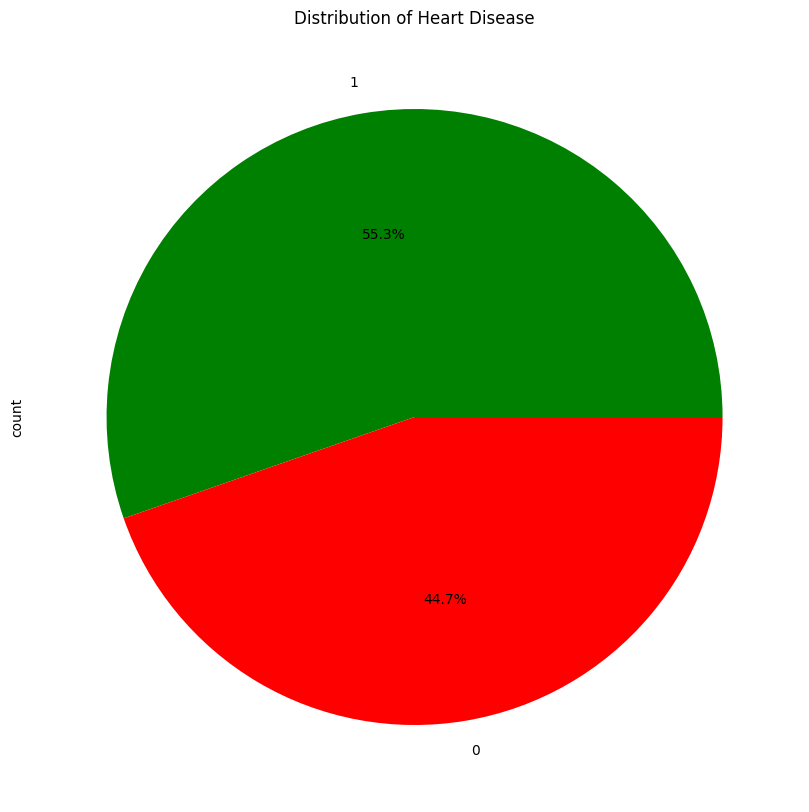

In [122]:
# Get value counts for the "HeartDisease" column
heart_disease_counts = df["HeartDisease"].value_counts()
colors = ['green', 'red']  
heart_disease_counts.plot(kind="pie", autopct='%1.1f%%', figsize=(10, 10), colors=colors)
plt.title("Distribution of Heart Disease")
plt.show()

In [123]:
# Extract the 'HeartDisease' column
heart_disease_column = df['HeartDisease']

heart_disease_percentage = round(heart_disease_column.value_counts(normalize=True)[1] * 100, 2)
not_heart_disease_percentage = round(heart_disease_column.value_counts(normalize=True)[0] * 100, 2)
heart_disease_count = heart_disease_column.value_counts()[1]
not_heart_disease_count = heart_disease_column.value_counts()[0]

print(f"Percentage of Heart Disease: {heart_disease_percentage}% ({heart_disease_count} cases for Heart Disease)")
print(f"Percentage of NOT Heart Disease: {not_heart_disease_percentage}% ({not_heart_disease_count} cases for NOT Heart Disease)")

Percentage of Heart Disease: 55.34% (508 cases for Heart Disease)
Percentage of NOT Heart Disease: 44.66% (410 cases for NOT Heart Disease)


In [124]:
analyze_column_with_condition(df, 'HeartDisease', [0, 1])

Overall Description of 'HeartDisease':


count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64


Description of 'HeartDisease' when it equals 0:


,count,mean,std,min,25%,50%,75%,max
Age,410.000000,50.551220,9.444915,28.000000,43.000000,51.000000,57.000000,76.000000
RestingBP,410.000000,130.180488,16.499585,80.000000,120.000000,130.000000,140.000000,190.000000
Cholesterol,410.000000,227.121951,74.634659,0.000000,197.250000,227.000000,266.750000,564.000000
FastingBS,410.000000,0.107317,0.309894,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,410.000000,148.151220,23.288067,69.000000,134.000000,150.000000,165.000000,202.000000
Oldpeak,410.000000,0.408049,0.699709,-1.100000,0.000000,0.000000,0.600000,4.200000
HeartDisease,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



Description of 'HeartDisease' when it equals 1:


,count,mean,std,min,25%,50%,75%,max
Age,508.000000,55.899606,8.727056,31.000000,51.000000,57.000000,62.000000,77.000000
RestingBP,508.000000,134.185039,19.828685,0.000000,120.000000,132.000000,145.000000,200.000000
Cholesterol,508.000000,175.940945,126.391398,0.000000,0.000000,217.000000,267.000000,603.000000
FastingBS,508.000000,0.334646,0.472332,0.000000,0.000000,0.000000,1.000000,1.000000
MaxHR,508.000000,127.655512,23.386923,60.000000,112.000000,126.000000,144.250000,195.000000
Oldpeak,508.000000,1.274213,1.151872,-2.600000,0.000000,1.200000,2.000000,6.200000
HeartDisease,508.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(<pandas.io.formats.style.Styler at 0x7b2d09466bf0>,
 <pandas.io.formats.style.Styler at 0x7b2d087aad40>)

In [125]:
kurtosis_value = df['HeartDisease'].kurtosis()
skewness_value = df['HeartDisease'].skew()

print(f"Kurtosis of '{'HeartDisease'}': {kurtosis_value}")
print(f"Skewness of '{'HeartDisease'}': {skewness_value}")

Kurtosis of 'HeartDisease': -1.9580084425329685
Skewness of 'HeartDisease': -0.21508633825088655


In [126]:
# Identify numerical columns, excluding 'HeartDisease'
numerical_columns = df.drop(['HeartDisease'], axis=1).select_dtypes(include='number').columns

# Identify categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Print the list of numerical and categorical columns
print("Numerical Columns: ", numerical_columns.tolist())
print("\nCategorical Columns: ", categorical_columns.tolist())


Numerical Columns:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

Categorical Columns:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [127]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


<br>
<h4 style = "font-size:30px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #000000; text-align: center; border-radius: 100px 100px;"> Boxplots of Numerical Features Against Heart Disease Status</h4>
<br>

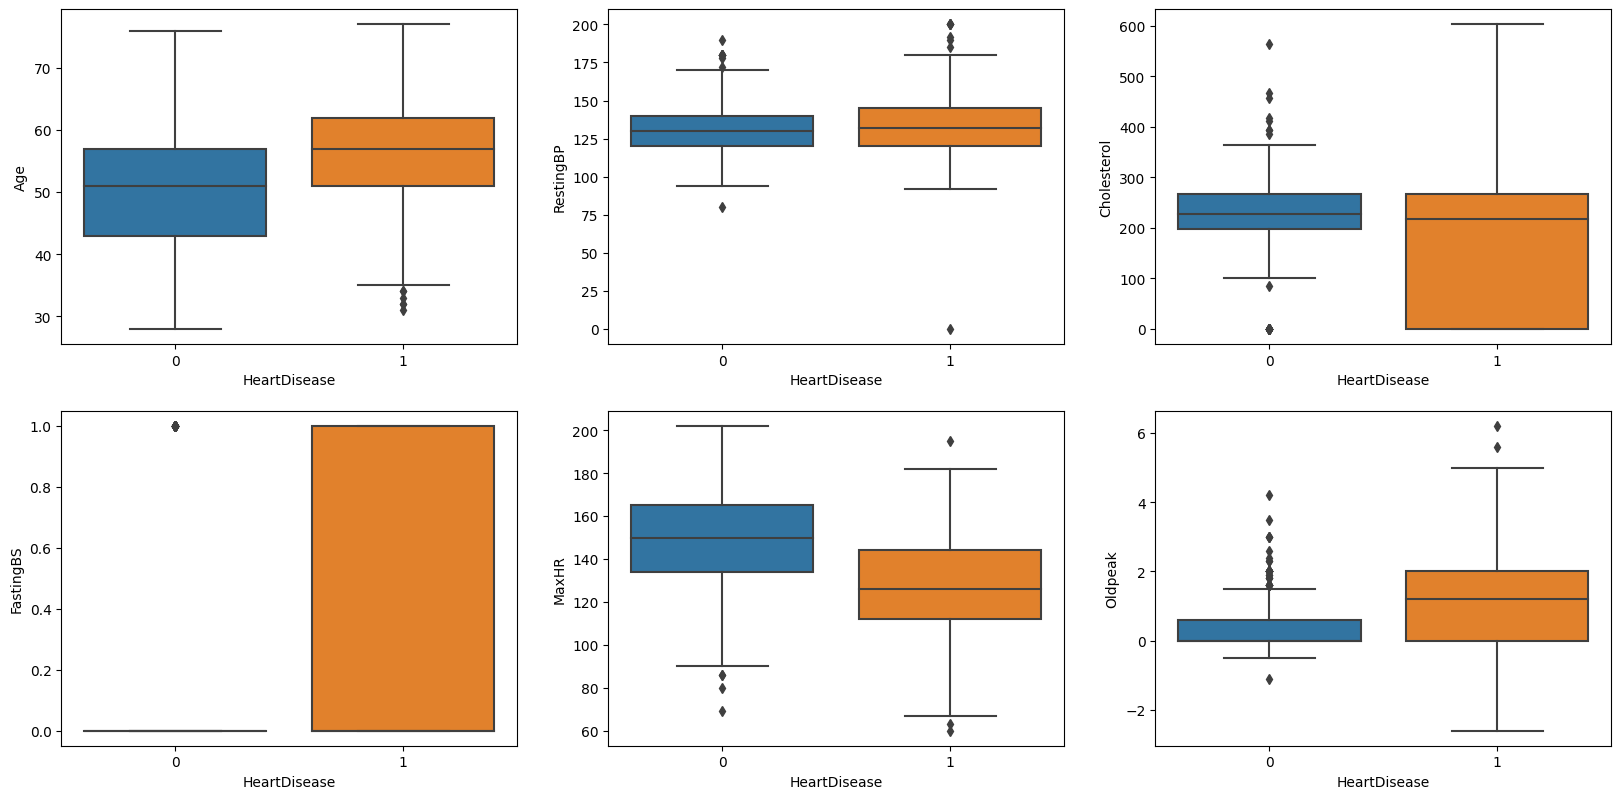

In [128]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical_columns:
    if feature != "HeartDisease":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='HeartDisease', y=feature, data=df)

<br>
<h4 style = "font-size:30px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #000000; text-align: center; border-radius: 100px 100px;"> Distribution of Numerical Features by Heart Disease Status</h4>
<br>

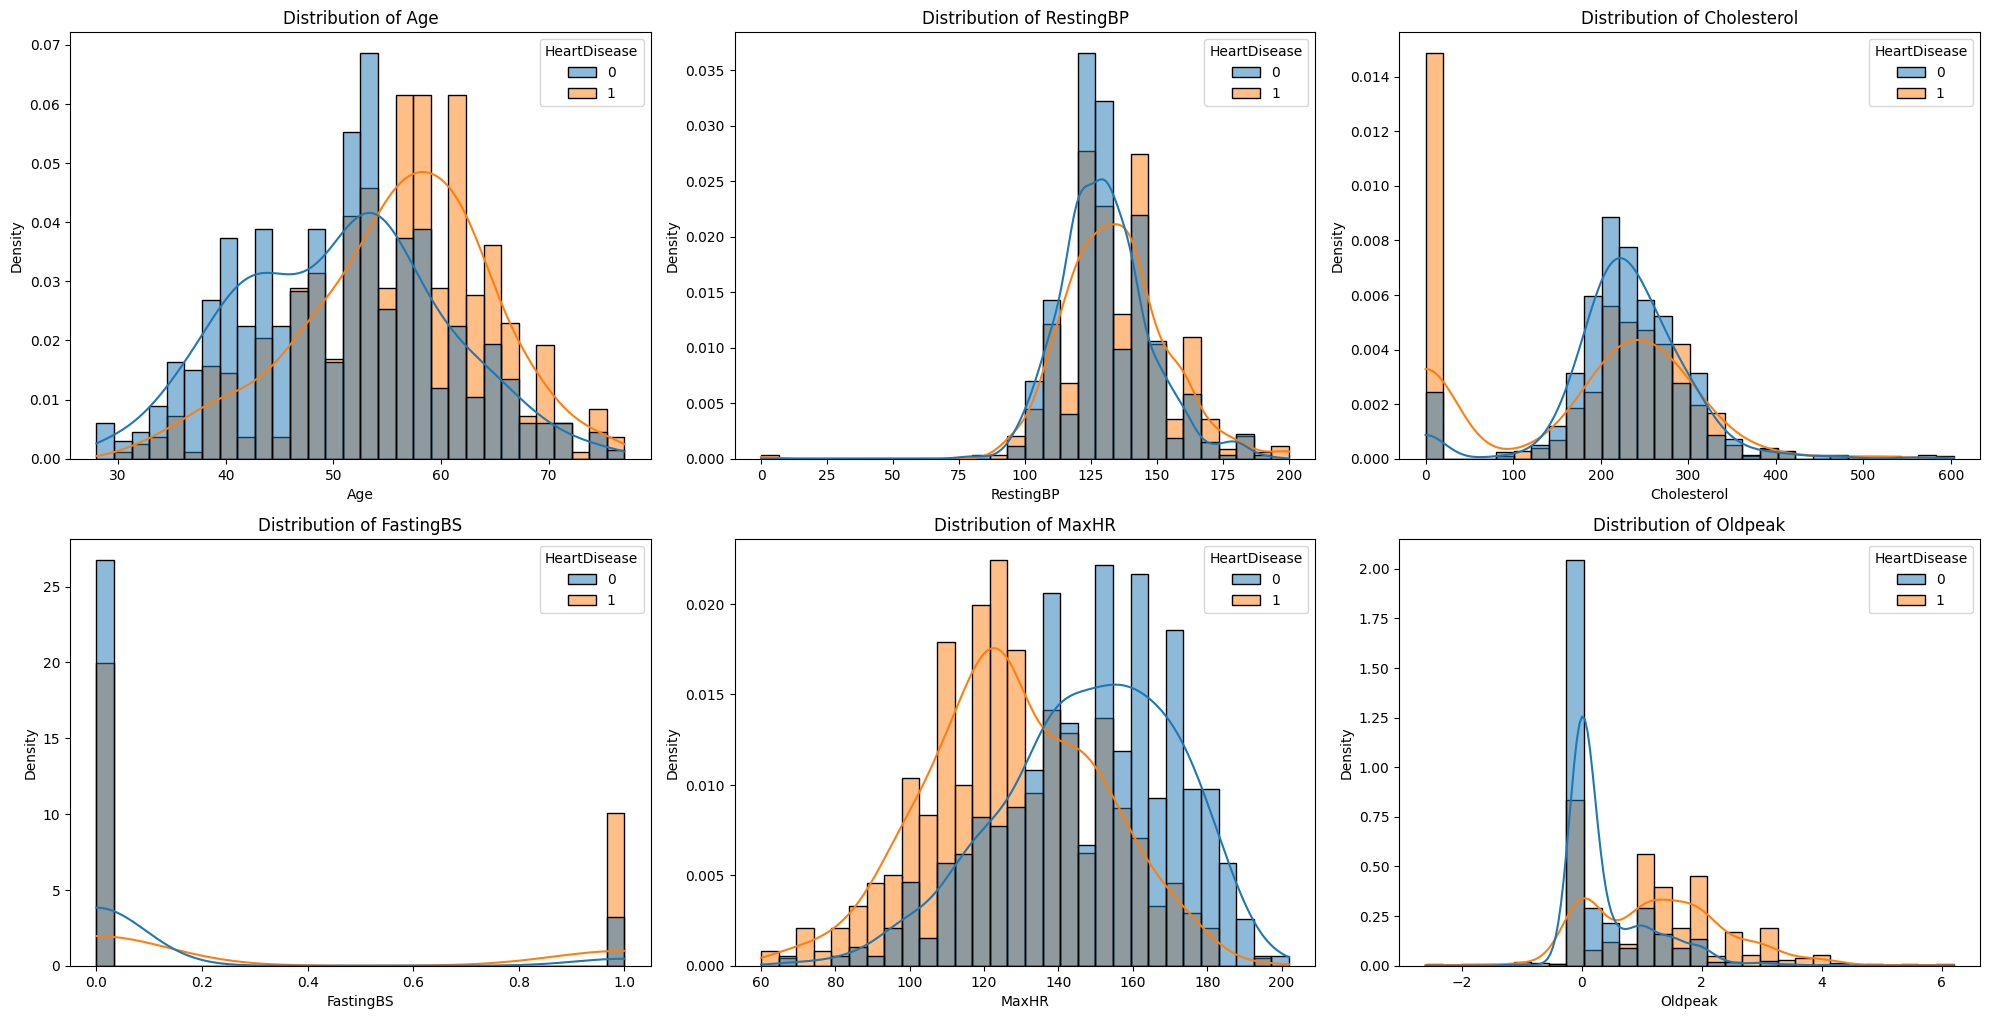

In [129]:
plt.figure(figsize=(20, 20))
for index, feature in enumerate(numerical_columns, 1):
    if feature != "HeartDisease":
        plt.subplot(4, 3, index)
        sns.histplot(x=df[feature], hue=df['HeartDisease'], kde=True, bins=30, stat="density", common_norm=False)
        plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [130]:
from colorama import Fore, Style

numeric_cols = df.select_dtypes(include='number').columns
skew_vals = df[numeric_cols].skew()

for col, skew in skew_vals.items():
    if -0.5 <= skew <= 0.5:
        print(f"Column: {col} | Skewness Value: {Style.BRIGHT}{Fore.GREEN}{skew}{Style.RESET_ALL} - Distribution is approximately {Style.BRIGHT}{Fore.GREEN}symmetric{Style.RESET_ALL}")
    elif (-1 <= skew < -0.5) or (0.5 < skew <= 1):
        print(f"Column: {col} | Skewness Value: {Style.BRIGHT}{Fore.YELLOW}{skew}{Style.RESET_ALL} - Distribution is approximately {Style.BRIGHT}{Fore.YELLOW}moderately skewed{Style.RESET_ALL}")
    else:
        print(f"Column: {col} | Skewness Value: {Style.BRIGHT}{Fore.RED}{skew}{Style.RESET_ALL} - Distribution is approximately {Style.BRIGHT}{Fore.RED}highly skewed{Style.RESET_ALL}")


Column: Age | Skewness Value: -0.19593302867569365 - Distribution is approximately symmetric
Column: RestingBP | Skewness Value: 0.1798393100516288 - Distribution is approximately symmetric
Column: Cholesterol | Skewness Value: -0.6100864307268192 - Distribution is approximately moderately skewed
Column: FastingBS | Skewness Value: 1.2644841750727027 - Distribution is approximately highly skewed
Column: MaxHR | Skewness Value: -0.14435941846180994 - Distribution is approximately symmetric
Column: Oldpeak | Skewness Value: 1.0228720218107528 - Distribution is approximately highly skewed
Column: HeartDisease | Skewness Value: -0.21508633825088655 - Distribution is approximately symmetric


In [131]:
from colorama import Fore, Style

numeric_cols = df.select_dtypes(include='number').columns
kurtosis_vals = df[numeric_cols].kurtosis()

for col, kurt in kurtosis_vals.items():
    if -0.5 <= kurt <= 0.5:
        print(f"Column: {col} | Kurtosis Value: {Style.BRIGHT}{Fore.GREEN}{kurt}{Style.RESET_ALL} - Distribution is approximately {Style.BRIGHT}{Fore.GREEN}mesokurtic{Style.RESET_ALL}")
    elif (-1 <= kurt < -0.5) or (0.5 < kurt <= 1):
        print(f"Column: {col} | Kurtosis Value: {Style.BRIGHT}{Fore.YELLOW}{kurt}{Style.RESET_ALL} - Distribution is approximately {Style.BRIGHT}{Fore.YELLOW}platykurtic{Style.RESET_ALL}")
    else:
        print(f"Column: {col} | Kurtosis Value: {Style.BRIGHT}{Fore.RED}{kurt}{Style.RESET_ALL} - Distribution is approximately {Style.BRIGHT}{Fore.RED}leptokurtic{Style.RESET_ALL}")


Column: Age | Kurtosis Value: -0.3861396123864571 - Distribution is approximately mesokurtic
Column: RestingBP | Kurtosis Value: 3.2712509168295356 - Distribution is approximately leptokurtic
Column: Cholesterol | Kurtosis Value: 0.11820846851766742 - Distribution is approximately mesokurtic
Column: FastingBS | Kurtosis Value: -0.40196025517466216 - Distribution is approximately mesokurtic
Column: MaxHR | Kurtosis Value: -0.4482478199521531 - Distribution is approximately mesokurtic
Column: Oldpeak | Kurtosis Value: 1.2030636840120112 - Distribution is approximately leptokurtic
Column: HeartDisease | Kurtosis Value: -1.9580084425329685 - Distribution is approximately leptokurtic


<br>
<h4 style = "font-size:30px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #000000; text-align: center; border-radius: 100px 100px;"> Correlation Heatmap of Numerical Features</h4>
<br>

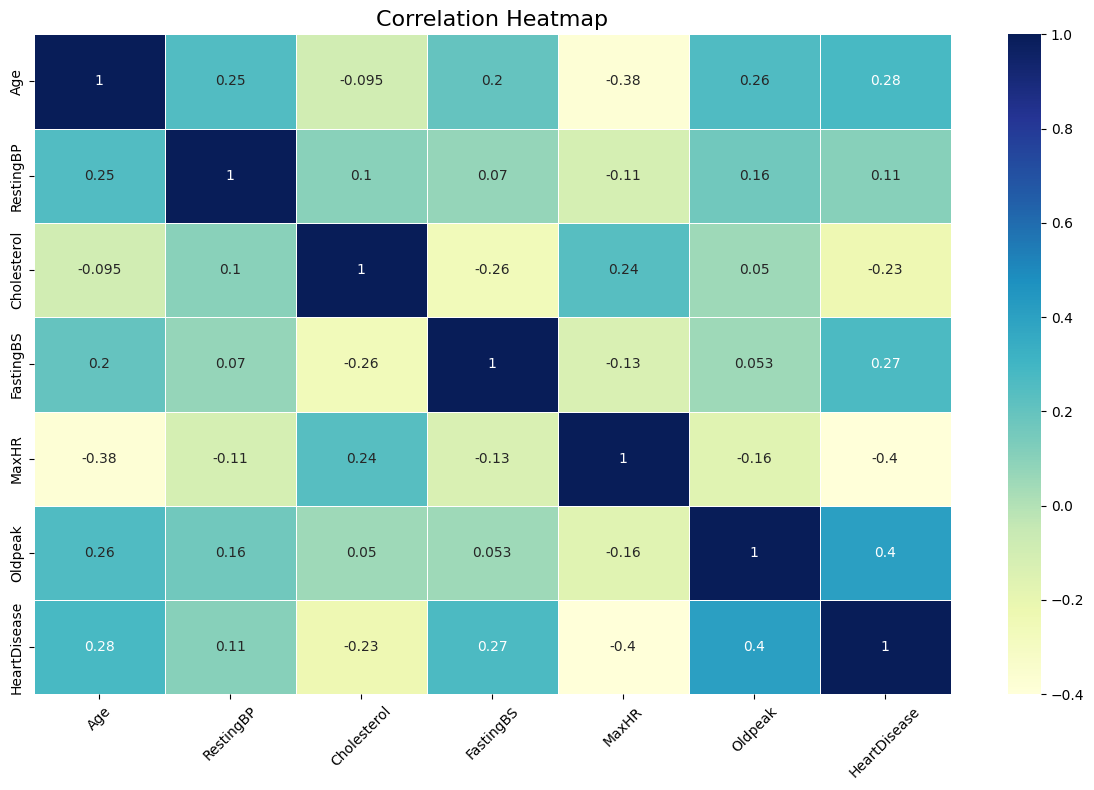

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Calculate the correlation matrix and plot the heatmap
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()

plt.show()


<br>
<h4 style = "font-size:30px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #000000; text-align: center; border-radius: 100px 100px;"> Count of Categories in Categorical Columns</h4>
<br>

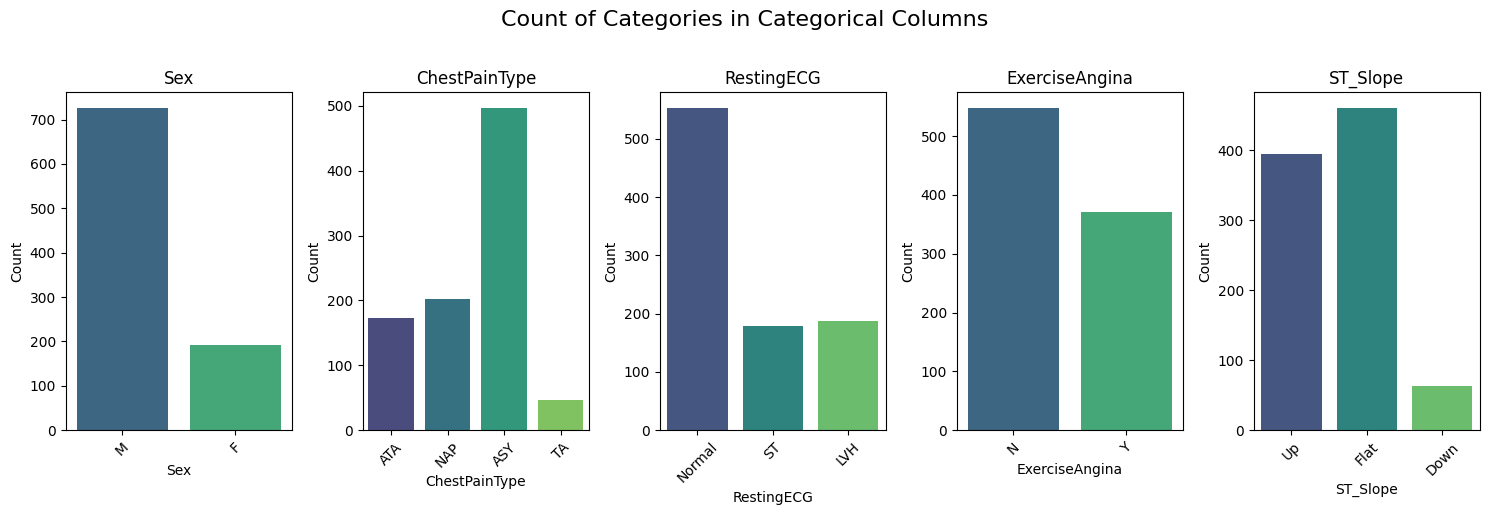

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))

for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    plt.savefig(f'/kaggle/working/Count_of_Categories_in_{column}.png')  # Save the figure

    fig.suptitle('Count of Categories in Categorical Columns', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


 
<br>
<h4 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #000000; text-align: center; border-radius: 100px 100px;"> Data Preprocessing</h4>
<br>

In [134]:
def calculate_iqr(df, columns):
    """Calculate the Interquartile Range (IQR) for specified columns in the DataFrame."""
    df_numeric = df[columns].select_dtypes(include=[np.number])  # Select only numeric columns
    quantile_1st = df_numeric.quantile(0.25)
    quantile_3rd = df_numeric.quantile(0.75)
    iqr = quantile_3rd - quantile_1st
    return quantile_1st, quantile_3rd, iqr

def detect_iqr_outliers(df, column, quantile_1st, quantile_3rd, iqr):
    """Detect outliers in a column based on IQR."""
    lower_bound = quantile_1st[column] - 1.5 * iqr[column]
    upper_bound = quantile_3rd[column] + 1.5 * iqr[column]
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

def detect_z_score_outliers(df, column):
    """Detect outliers in a column based on Z-score."""
    mean = df[column].mean()
    std = df[column].std()
    return df[((df[column] - mean) / std).abs() > 3]

def replace_outliers(df, column, quantile_1st, quantile_3rd, iqr):
    """Replace outliers in a column with the nearest non-outlier values."""
    lower_bound = quantile_1st[column] - 1.5 * iqr[column]
    upper_bound = quantile_3rd[column] + 1.5 * iqr[column]
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    print(f'Outliers replaced for {column}')

def visualize_distribution(df, column):
    """Visualize the distribution of a column with boxplot and density plot."""
    print(f"*********************** {column} ***********************\n")
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 1, 1)
    df[column].plot(kind='box', subplots=True, sharex=False, vert=False)
    plt.subplot(2, 1, 2)
    df[column].plot(kind='density', subplots=True, sharex=False)
    plt.show()

IQR Outliers in Age: 0
Z-score Outliers in Age: 0
IQR Outliers in RestingBP: 28
Z-score Outliers in RestingBP: 8
IQR Outliers in Cholesterol: 183
Z-score Outliers in Cholesterol: 3
IQR Outliers in FastingBS: 214
Z-score Outliers in FastingBS: 0
IQR Outliers in MaxHR: 2
Z-score Outliers in MaxHR: 1
IQR Outliers in Oldpeak: 16
Z-score Outliers in Oldpeak: 7
*********************** Age ***********************



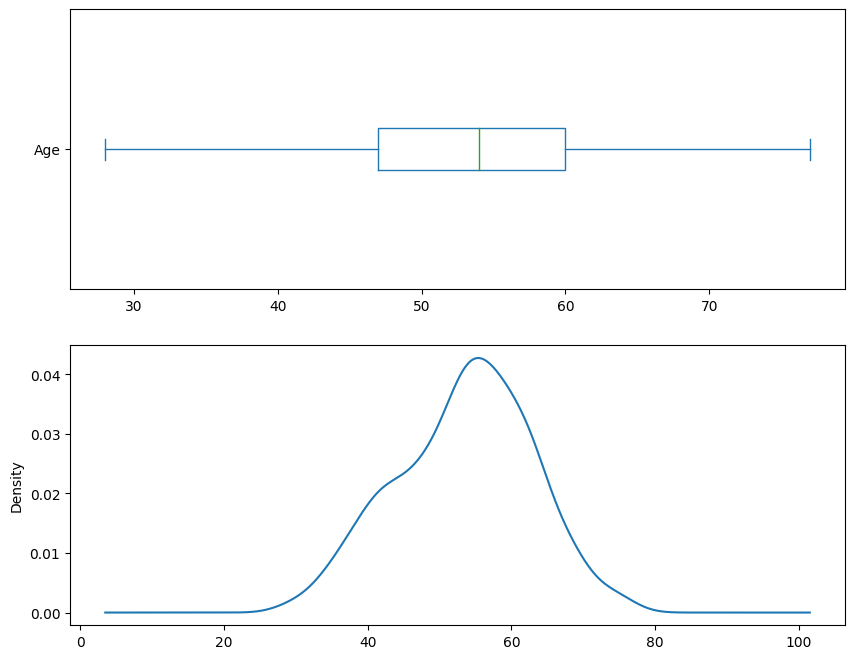

*********************** RestingBP ***********************



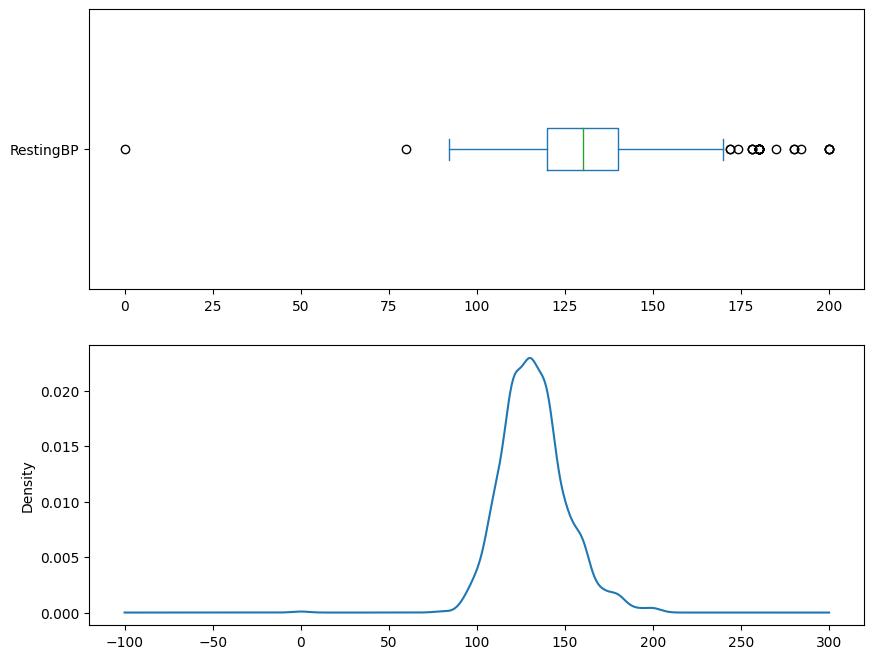

*********************** Cholesterol ***********************



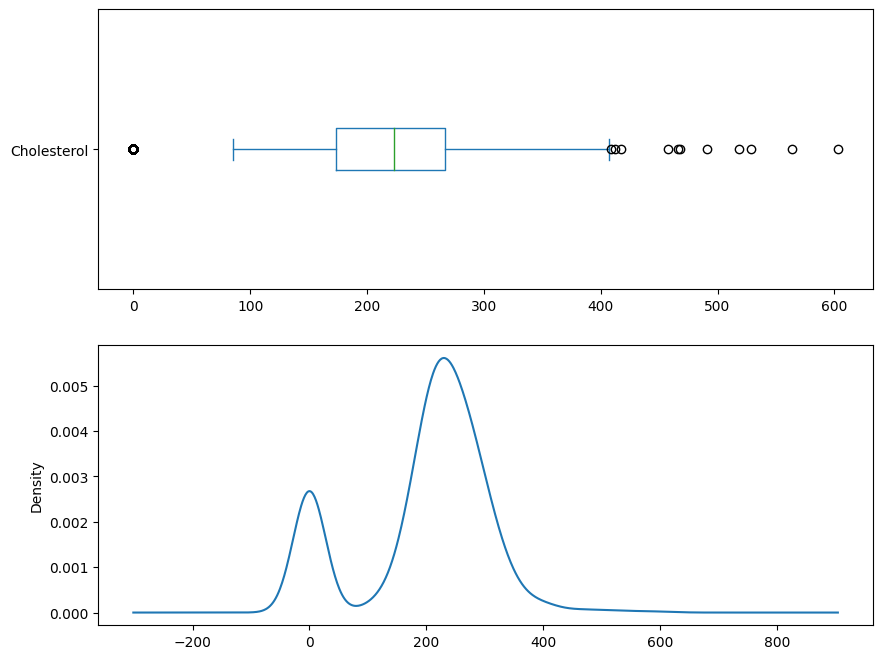

*********************** FastingBS ***********************



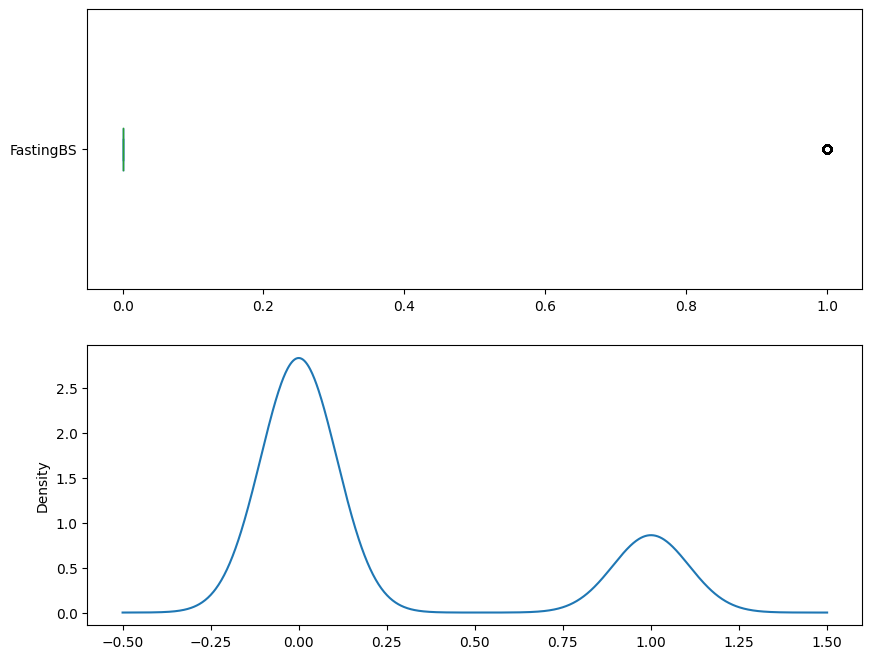

*********************** MaxHR ***********************



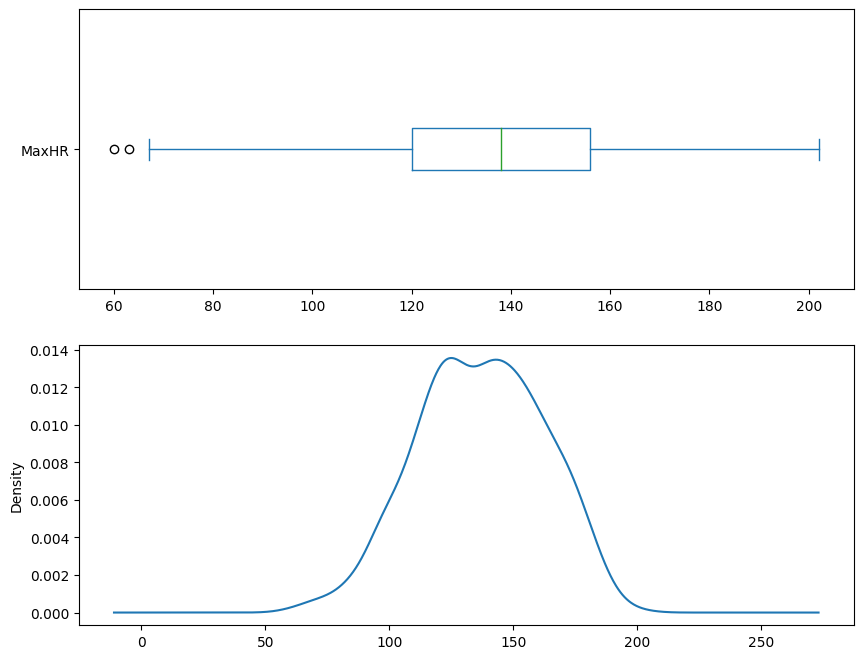

*********************** Oldpeak ***********************



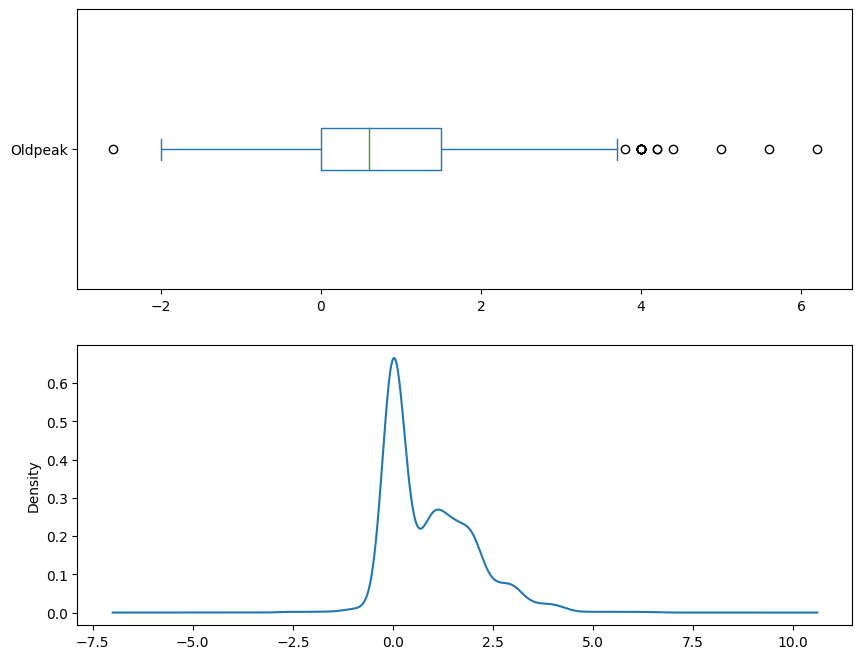

Features with outliers: ['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Outliers replaced for RestingBP
Outliers replaced for Cholesterol
Outliers replaced for FastingBS
Outliers replaced for MaxHR
Outliers replaced for Oldpeak


In [135]:
numeric_features = numerical_columns

quantile_1st, quantile_3rd, iqr = calculate_iqr(df, numeric_features)

for feature in numeric_features:
    iqr_outliers = detect_iqr_outliers(df, feature, quantile_1st, quantile_3rd, iqr)
    z_score_outliers = detect_z_score_outliers(df, feature)
    print(f"IQR Outliers in {feature}: {iqr_outliers.shape[0]}")
    print(f"Z-score Outliers in {feature}: {z_score_outliers.shape[0]}")

for feature in numeric_features:
    visualize_distribution(df, feature)

outliers_detected = [feature for feature in numeric_features if detect_iqr_outliers(df, feature, quantile_1st, quantile_3rd, iqr).shape[0] != 0]
print("Features with outliers:", outliers_detected)

for feature in outliers_detected:
    replace_outliers(df, feature, quantile_1st, quantile_3rd, iqr)

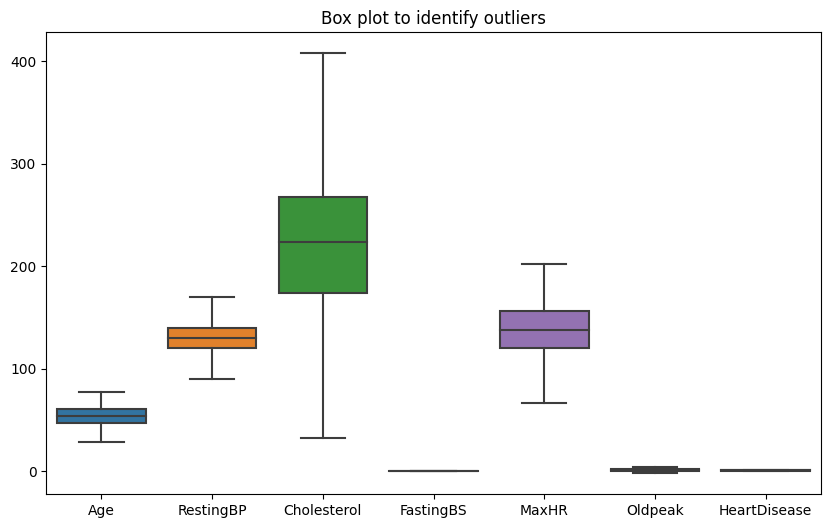

In [136]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plot to identify outliers')
plt.show()


<br>
<h4 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #000000; text-align: center; border-radius: 100px 100px;"> Qualitative Data to Quantitative</h4>
<br>

In [137]:
from sklearn.preprocessing import LabelEncoder


In [138]:
def encode_categorical_features(df, categorical_features):
    df_encoded = df.copy()
    for feature in categorical_features:
        le = LabelEncoder()
        df_encoded[feature] = le.fit_transform(df_encoded[feature])
    return df_encoded

In [139]:
categorical_features= ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [140]:
df_encoded = encode_categorical_features(df, categorical_features)
print(df_encoded.head(5))

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140        289.0          0           1   
1   49    0              2        160        180.0          0           1   
2   37    1              1        130        283.0          0           2   
3   48    0              0        138        214.0          0           1   
4   54    1              2        150        195.0          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [141]:
df_encoded.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0
5,39,1,2,120,339.0,0,1,170,0,0.0,2,0
6,45,0,1,130,237.0,0,1,170,0,0.0,2,0
7,54,1,1,110,208.0,0,1,142,0,0.0,2,0
8,37,1,0,140,207.0,0,1,130,1,1.5,1,1
9,48,0,1,120,284.0,0,1,120,0,0.0,2,0


In [142]:
df = df_encoded

# Duplicate data

In [143]:
df.loc[df.duplicated()].shape

(0, 12)

<br>
<h4 style = "font-size:30px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #000000; text-align: center; border-radius: 100px 100px;"> Train/Test Split & Normalization</h4>
<br>

In [144]:
from sklearn.model_selection import train_test_split


In [145]:
x = df.drop("HeartDisease", axis = 1)
y = df['HeartDisease']

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =100 ,stratify=y, test_size = 0.3)
print(y_train.value_counts())

HeartDisease
1    355
0    287
Name: count, dtype: int64


In [147]:
scale = MinMaxScaler()
col = ['Age', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'RestingECG', 'MaxHR', 'Oldpeak', 'ST_Slope']

x_train[col] = scale.fit_transform(x_train[col])
x_test[col] = scale.transform(x_test[col])

# Feature Selction

In [148]:
# Define the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=0)

# Use Sequential Feature Selector (SFS) for feature selection
sfs = SFS(estimator=gb_classifier,
          k_features=7,
          forward=True,
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=4,
          n_jobs=-1)

# Fit the SFS on the training data
sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    2.4s finished

[2024-01-26 20:03:52] Features: 1/7 -- score: 0.8130628881987577[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished

[2024-01-26 20:03:53] Features: 2/7 -- score: 0.8364615683229814[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.1s finished

[2024-01-26 20:03:55] Features: 3/7 -- score: 0.8457880434782609[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.9s finished

[2024-01-26 20:03:56] Features: 4/7 -- score: 0.861354

SequentialFeatureSelector(cv=4,
                          estimator=GradientBoostingClassifier(random_state=0),
                          k_features=(7, 7), n_jobs=-1, scoring='accuracy',
                          verbose=2)

In [149]:
print("Best features: ",sfs.k_feature_names_)
print("Best score: ",sfs.k_score_)

Best features:  ('Sex', 'ChestPainType', 'Cholesterol', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope')
Best score:  0.8644798136645964


<h2 style = "font-family:garamond; font-size:50px; background-color: #000000; color : #fe346e; border-radius: 100px 100px; text-align:center"> 4. Modelling and Results</h2>

Text(0.5, 1.0, 'Accuracy Scores for Values of k of k-Nearest-Neighbors')

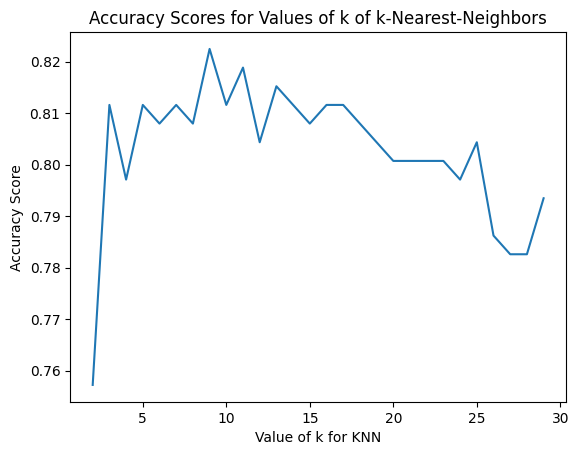

In [150]:
k_range = list(range(2,30))
scores = []

for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train, y_train)
    y_pred = KNN.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')

In [151]:
d = {'best features number': range(2,30), 'train_score': scores}
df = pd.DataFrame(data=d)
print("max accuracy:",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())

max accuracy: 0.822463768115942
max accuracy id: 7


In [152]:
n_neighbors = df["train_score"].idxmax()

KNN = KNeighborsClassifier(n_neighbors=n_neighbors)
KNN.fit(x_train, y_train)

y_test_pred_KNN = KNN.predict(x_test)
y_train_pred_KNN = KNN.predict(x_train)

test_acc_KNN = accuracy_score(y_test, y_test_pred_KNN)
train_acc_KNN = accuracy_score(y_train, y_train_pred_KNN)
scores_KNN = cross_val_score(KNN, x_train , y_train , cv = 10, scoring = 'accuracy' )

precision_score_KNN = precision_score(y_test, y_test_pred_KNN)
recall_score_KNN = recall_score(y_test, y_test_pred_KNN)
f1_score_KNN = f1_score(y_test, y_test_pred_KNN)
conf_KNN = confusion_matrix(y_test, y_test_pred_KNN)

print_section_header("Train set Accuracy")
print("Accuracy: {:.2%}".format(train_acc_KNN))

print_section_header("Test set Accuracy")
print("Accuracy: {:.2%}".format(test_acc_KNN))

print_section_header("Cross-validation")
print("Mean Score: {:.2%}\n".format(scores_KNN.mean()))

print_section_header("Metrics Summary")
print("Precision: {:.4f}".format(precision_score_KNN))
print("Recall:    {:.4f}".format(recall_score_KNN))
print("F1 Score:  {:.4f}".format(f1_score_KNN))

print_section_header("Classification Report")
print("{}\n".format(classification_report(y_test, y_test_pred_KNN)))


------------------------------------------------------------
                     Train set Accuracy                     
------------------------------------------------------------
Accuracy: 88.94%

------------------------------------------------------------
                     Test set Accuracy                      
------------------------------------------------------------
Accuracy: 81.16%

------------------------------------------------------------
                      Cross-validation                      
------------------------------------------------------------
Mean Score: 85.99%


------------------------------------------------------------
                      Metrics Summary                       
------------------------------------------------------------
Precision: 0.8483
Recall:    0.8039
F1 Score:  0.8255

------------------------------------------------------------
                   Classification Report                    
---------------------------------

In [153]:
LR = LogisticRegression(C=2, penalty='l1', random_state=0, solver='liblinear')
LR.fit(x_train, y_train)

y_test_pred_LR = LR.predict(x_test)
y_train_pred_LR = LR.predict(x_train)

test_acc_LR = accuracy_score(y_test, y_test_pred_LR)
train_acc_LR = accuracy_score(y_train, y_train_pred_LR)
scores_LR = cross_val_score(LR, x_train , y_train , cv = 10, scoring = 'accuracy' )

precision_score_LR = precision_score(y_test, y_test_pred_LR)
recall_score_LR = recall_score(y_test, y_test_pred_LR)
f1_score_LR = f1_score(y_test, y_test_pred_LR)
conf_LR = confusion_matrix(y_test, y_test_pred_LR)


print_section_header("Train set Accuracy")
print("Accuracy: {:.2%}".format(train_acc_LR))

print_section_header("Test set Accuracy")
print("Accuracy: {:.2%}".format(test_acc_LR))

print_section_header("Cross-validation")
print("Mean Score: {:.2%}\n".format(scores_LR.mean()))

print_section_header("Metrics Summary")
print("Precision: {:.4f}".format(precision_score_LR))
print("Recall:    {:.4f}".format(recall_score_LR))
print("F1 Score:  {:.4f}".format(f1_score_LR))

print_section_header("Classification Report")
print("{}\n".format(classification_report(y_test, y_test_pred_LR)))


------------------------------------------------------------
                     Train set Accuracy                     
------------------------------------------------------------
Accuracy: 85.67%

------------------------------------------------------------
                     Test set Accuracy                      
------------------------------------------------------------
Accuracy: 81.16%

------------------------------------------------------------
                      Cross-validation                      
------------------------------------------------------------
Mean Score: 84.43%


------------------------------------------------------------
                      Metrics Summary                       
------------------------------------------------------------
Precision: 0.8483
Recall:    0.8039
F1 Score:  0.8255

------------------------------------------------------------
                   Classification Report                    
---------------------------------

In [154]:
MLP = MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.1, random_state=0,
              solver='sgd')
MLP.fit(x_train, y_train)

y_test_pred_MLP = MLP.predict(x_test)
y_train_pred_MLP = MLP.predict(x_train)

test_acc_MLP = accuracy_score(y_test, y_test_pred_MLP)
train_acc_MLP = accuracy_score(y_train, y_train_pred_MLP)
scores_MLP = cross_val_score(MLP, x_train , y_train , cv = 10, scoring = 'accuracy' )

precision_score_MLP = precision_score(y_test, y_test_pred_MLP)
recall_score_MLP = recall_score(y_test, y_test_pred_MLP)
f1_score_MLP = f1_score(y_test, y_test_pred_MLP)
conf_MLP = confusion_matrix(y_test, y_test_pred_MLP)


print_section_header("Train set Accuracy")
print("Accuracy: {:.2%}".format(train_acc_MLP))

print_section_header("Test set Accuracy")
print("Accuracy: {:.2%}".format(test_acc_MLP))

print_section_header("Cross-validation")
print("Mean Score: {:.2%}\n".format(scores_MLP.mean()))

print_section_header("Metrics Summary")
print("Precision: {:.4f}".format(precision_score_MLP))
print("Recall:    {:.4f}".format(recall_score_MLP))
print("F1 Score:  {:.4f}".format(f1_score_MLP))

print_section_header("Classification Report")
print("{}\n".format(classification_report(y_test, y_test_pred_MLP)))


------------------------------------------------------------
                     Train set Accuracy                     
------------------------------------------------------------
Accuracy: 90.34%

------------------------------------------------------------
                     Test set Accuracy                      
------------------------------------------------------------
Accuracy: 83.70%

------------------------------------------------------------
                      Cross-validation                      
------------------------------------------------------------
Mean Score: 86.93%


------------------------------------------------------------
                      Metrics Summary                       
------------------------------------------------------------
Precision: 0.8506
Recall:    0.8562
F1 Score:  0.8534

------------------------------------------------------------
                   Classification Report                    
---------------------------------

In [155]:
SVM = SVC(C=10, gamma=0.5, kernel='poly', random_state=0, probability=True)
SVM.fit(x_train, y_train)

y_test_pred_SVM = SVM.predict(x_test)
y_train_pred_SVM = SVM.predict(x_train)

test_acc_SVM = accuracy_score(y_test, y_test_pred_SVM)
train_acc_SVM = accuracy_score(y_train, y_train_pred_SVM)
scores_SVM = cross_val_score(SVM, x_train , y_train , cv = 10, scoring = 'accuracy' )

precision_score_SVM = precision_score(y_test, y_test_pred_SVM, average='macro')
recall_score_SVM = recall_score(y_test, y_test_pred_SVM, average='macro')
f1_score_SVM = f1_score(y_test, y_test_pred_SVM, average='macro')
conf_SVM = confusion_matrix(y_test, y_test_pred_SVM)


print_section_header("Train set Accuracy")
print("Accuracy: {:.2%}".format(train_acc_SVM))

print_section_header("Test set Accuracy")
print("Accuracy: {:.2%}".format(test_acc_SVM))

print_section_header("Cross-validation")
print("Mean Score: {:.2%}\n".format(scores_SVM.mean()))

print_section_header("Metrics Summary")
print("Precision: {:.4f}".format(precision_score_SVM))
print("Recall:    {:.4f}".format(recall_score_SVM))
print("F1 Score:  {:.4f}".format(f1_score_SVM))

print_section_header("Classification Report")
print("{}\n".format(classification_report(y_test, y_test_pred_SVM)))



------------------------------------------------------------
                     Train set Accuracy                     
------------------------------------------------------------
Accuracy: 91.90%

------------------------------------------------------------
                     Test set Accuracy                      
------------------------------------------------------------
Accuracy: 82.97%

------------------------------------------------------------
                      Cross-validation                      
------------------------------------------------------------
Mean Score: 87.24%


------------------------------------------------------------
                      Metrics Summary                       
------------------------------------------------------------
Precision: 0.8275
Recall:    0.8289
F1 Score:  0.8281

------------------------------------------------------------
                   Classification Report                    
---------------------------------

In [156]:
RF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2, n_estimators=25,random_state=0)

RF.fit(x_train, y_train)

y_test_pred_RF = RF.predict(x_test)
y_train_pred_RF = RF.predict(x_train)

test_acc_RF = accuracy_score(y_test, y_test_pred_RF)
train_acc_RF = accuracy_score(y_train, y_train_pred_RF)
scores_RF= cross_val_score(RF, x_train , y_train , cv = 10, scoring = 'accuracy' )

precision_score_RF = precision_score(y_test, y_test_pred_RF)
recall_score_RF = recall_score(y_test, y_test_pred_RF)
f1_score_RF = f1_score(y_test, y_test_pred_RF)
conf_RF = confusion_matrix(y_test, y_test_pred_RF)


print_section_header("Train set Accuracy")
print("Accuracy: {:.2%}".format(train_acc_RF))

print_section_header("Test set Accuracy")
print("Accuracy: {:.2%}".format(test_acc_RF))

print_section_header("Cross-validation")
print("Mean Score: {:.2%}\n".format(scores_RF.mean()))

print_section_header("Metrics Summary")
print("Precision: {:.4f}".format(precision_score_RF))
print("Recall:    {:.4f}".format(recall_score_RF))
print("F1 Score:  {:.4f}".format(f1_score_RF))

print_section_header("Classification Report")
print("{}\n".format(classification_report(y_test, y_test_pred_RF)))



------------------------------------------------------------
                     Train set Accuracy                     
------------------------------------------------------------
Accuracy: 96.42%

------------------------------------------------------------
                     Test set Accuracy                      
------------------------------------------------------------
Accuracy: 81.52%

------------------------------------------------------------
                      Cross-validation                      
------------------------------------------------------------
Mean Score: 87.71%


------------------------------------------------------------
                      Metrics Summary                       
------------------------------------------------------------
Precision: 0.8355
Recall:    0.8301
F1 Score:  0.8328

------------------------------------------------------------
                   Classification Report                    
---------------------------------

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time

 
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 3]
}

RF = RandomForestClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=2)

# Start the timer
start_time = time.time()

# Fit GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Stop the timer and calculate the elapsed time
elapsed_time = time.time() - start_time

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions with the best model
y_test_pred_RF = best_rf.predict(x_test)

# Evaluate the best model
test_acc_RF = accuracy_score(y_test, y_test_pred_RF)

# Print the results
print("Best Parameters:", grid_search.best_params_)
print("Test set Accuracy:", test_acc_RF)
print("Training time (Grid Search): {:.2f} seconds".format(elapsed_time))

Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time

In [158]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# Calculate training accuracy
y_train_pred_RF = best_rf.predict(x_train)
train_acc_RF = accuracy_score(y_train, y_train_pred_RF)

# Calculate cross-validation accuracy
scores_RF = cross_val_score(best_rf, x_train, y_train, cv=10, scoring='accuracy')

# Calculate precision, recall, and F1-score
precision_score_RF = precision_score(y_test, y_test_pred_RF)
recall_score_RF = recall_score(y_test, y_test_pred_RF)
f1_score_RF = f1_score(y_test, y_test_pred_RF)

# Generate the classification report
classification_rep_RF = classification_report(y_test, y_test_pred_RF)

# Print the results
print_section_header("Train set Accuracy")
print("Accuracy: {:.2%}".format(train_acc_RF))

print_section_header("Test set Accuracy")
print("Accuracy: {:.2%}".format(test_acc_RF))

print_section_header("CV Accuracy")
print("Mean Score: {:.2%}\n".format(scores_RF.mean()))

print_section_header("Metrics Summary")
print("Precision Score: {:.4f}".format(precision_score_RF))
print("Recall Score:    {:.4f}".format(recall_score_RF))
print("F1 Score:        {:.4f}".format(f1_score_RF))

print_section_header("Classification Report")
print("{}\n".format(classification_rep_RF))


------------------------------------------------------------
                     Train set Accuracy                     
------------------------------------------------------------
Accuracy: 98.13%

------------------------------------------------------------
                     Test set Accuracy                      
------------------------------------------------------------
Accuracy: 84.06%

------------------------------------------------------------
                        CV Accuracy                         
------------------------------------------------------------
Mean Score: 88.17%


------------------------------------------------------------
                      Metrics Summary                       
------------------------------------------------------------
Precision Score: 0.8658
Recall Score:    0.8431
F1 Score:        0.8543

------------------------------------------------------------
                   Classification Report                    
---------------

In [159]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time

 
# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100]
}

# Initialize the SVM classifier
svm = SVC(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=2)

# Start the timer
start_time = time.time()

# Fit GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Stop the timer and calculate the elapsed time
elapsed_time = time.time() - start_time

# Get the best model
best_svm = grid_search.best_estimator_

# Make predictions with the best model
y_test_pred_svm = best_svm.predict(x_test)

# Evaluate the best model
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)

# Print the results
print("Best Parameters:", grid_search.best_params_)
print("Test set Accuracy:", test_acc_svm)
print("Training time (Grid Search): {:.2f} seconds".format(elapsed_time))


Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10; tota